In [ ]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import numpy as np

print(tf.__version__)

2.8.2


In [ ]:
data = load_breast_cancer()

In [ ]:
print("Data type:", type(data))
print("Data Keys:", data.keys())
print("Data Shape:", data.data.shape)

Data type: <class 'sklearn.utils.Bunch'>
Data Keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Data Shape: (569, 30)


In [ ]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
print("Target names: ", data.target_names)
print("Target shape", data.target.shape)

Target names:  ['malignant' 'benign']
Target shape (569,)


In [ ]:
# Determine the meaning of each feature
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
# Split the data int train and test sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [ ]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Build  de model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.compile(
    optimizer="adam", 
    loss="binary_crossentropy", 
    metrics=["accuracy"]
)

In [ ]:
# Train de model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 1s 28ms/step - loss: 0.3819 - accuracy: 0.8478 - val_loss: 0.4142 - val_accuracy: 0.8670
Epoch 2/100
12/12 [==============================] - 0s 9ms/step - loss: 0.3502 - accuracy: 0.8819 - val_loss: 0.3820 - val_accuracy: 0.8723
Epoch 3/100
12/12 [==============================] - 0s 8ms/step - loss: 0.3235 - accuracy: 0.8950 - val_loss: 0.3549 - val_accuracy: 0.8723
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 0.3016 - accuracy: 0.9055 - val_loss: 0.3321 - val_accuracy: 0.9043
Epoch 5/100
12/12 [==============================] - 0s 11ms/step - loss: 0.2831 - accuracy: 0.9108 - val_loss: 0.3127 - val_accuracy: 0.9096
Epoch 6/100
12/12 [==============================] - 0s 8ms/step - loss: 0.2676 - accuracy: 0.9186 - val_loss: 0.2959 - val_accuracy: 0.9096
Epoch 7/100
12/12 [==============================] - 0s 8ms/step - loss: 0.2538 - accuracy: 0.9265 - val_loss: 0.2820 - val_accuracy: 0.9096
Epoch 8/100

In [ ]:
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 2ms/step - loss: 0.0771 - accuracy: 0.9790
Train score: [0.07710295915603638, 0.9790025949478149]
6/6 [==============================] - 0s 3ms/step - loss: 0.1000 - accuracy: 0.9787
Test score: [0.10002782195806503, 0.978723406791687]


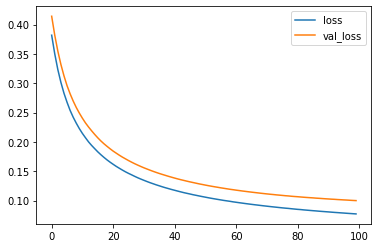

In [ ]:
# Plot what's returned by model.fit
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

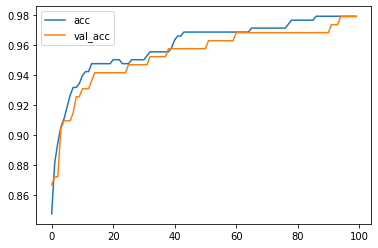

In [ ]:
# Plot the accuracy too
plt.plot(r.history["accuracy"], label="acc")
plt.plot(r.history["val_accuracy"], label="val_acc")
plt.legend()

## Making Preditions

In [ ]:
# Make predictions
P = model.predict(X_test)
print(P) # they are outputs of the sigmoid, interpreted as probabilities p(y = 1 | x)

[[1.26580596e-02]
 [9.94282603e-01]
 [1.58934802e-01]
 [4.00325060e-02]
 [9.90410805e-01]
 [6.95156097e-01]
 [5.64962626e-04]
 [7.33058003e-10]
 [9.98315096e-01]
 [9.99154210e-01]
 [1.79797411e-04]
 [9.98676062e-01]
 [3.81452054e-07]
 [1.15515613e-04]
 [9.97815609e-01]
 [9.86723304e-01]
 [4.68867123e-02]
 [5.27945161e-03]
 [9.53592896e-01]
 [2.11018958e-09]
 [9.97680902e-01]
 [9.20949280e-01]
 [5.67319134e-08]
 [4.59232926e-03]
 [6.47168932e-08]
 [9.65816259e-01]
 [9.96159196e-01]
 [2.11179554e-02]
 [2.11879611e-03]
 [9.98204291e-01]
 [9.78265524e-01]
 [9.91229892e-01]
 [2.17134880e-06]
 [7.62820244e-04]
 [9.82902884e-01]
 [7.03456998e-01]
 [9.99955535e-01]
 [9.98642206e-01]
 [3.16909063e-05]
 [1.91032887e-04]
 [1.02182746e-01]
 [9.99158025e-01]
 [3.45883163e-05]
 [9.99576449e-01]
 [6.53858602e-01]
 [9.82668042e-01]
 [6.12586737e-05]
 [9.96177912e-01]
 [7.58081675e-03]
 [9.67524052e-01]
 [9.98453796e-01]
 [9.96354818e-01]
 [9.97046828e-01]
 [9.88669157e-01]
 [9.32549953e-01]
 [9.999282

In [ ]:
# Round to get the actual preditions
# Note: has to be flattened since the targets are size (N,) while the predictions are size (N, 1)
P = np.round(P).flatten()
print(P)

[0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0.
 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1.]


In [ ]:
# Calculate the accuracy, compare it to evaluate() output
print("Manually calculated accuracy:", np.mean(P == y_test))
print("Evaluate output:", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.9787234042553191
6/6 [==============================] - 0s 3ms/step - loss: 0.1000 - accuracy: 0.9787
Evaluate output: [0.10002782195806503, 0.978723406791687]
